In [16]:
# Import Pandas, Matplotlib, NumPy
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, we add it to the cities list
    if city not in cities:
       cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

620

In [6]:
# Import the datetime module from the datetime library
from config import weather_api_key
from datetime import datetime
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b6fd0af6211daf19d860028bccc0a5a3


In [7]:
# Create an empty list to hold the weather data
city_data=[]

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print(".............................")

# Create counters
record_count = 1
set_count = 1

# Loop thu all the cities in the list:
for i, city in enumerate(cities):
    # Group cities in set of 50 for logging
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count}of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
         # Append the city information into city_data list.
        city_data.append({"City": city.title(),"Lat": city_lat,"Lng": city_lng, "Max Temp": city_max_temp,
    "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, 
    "Country": city_country, "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
.............................
Processing Record 1of Set 1 | neryungri
Processing Record 2of Set 1 | zheshart
Processing Record 3of Set 1 | klaksvik
Processing Record 4of Set 1 | new norfolk
Processing Record 5of Set 1 | urumqi
Processing Record 6of Set 1 | butaritari
Processing Record 7of Set 1 | carnarvon
Processing Record 8of Set 1 | punta arenas
Processing Record 9of Set 1 | faanui
Processing Record 10of Set 1 | hilo
Processing Record 11of Set 1 | ouango
Processing Record 12of Set 1 | bokoro
Processing Record 13of Set 1 | aiken
Processing Record 14of Set 1 | puerto ayora
Processing Record 15of Set 1 | ushuaia
Processing Record 16of Set 1 | calama
Processing Record 17of Set 1 | vestmannaeyjar
Processing Record 18of Set 1 | kodiak
Processing Record 19of Set 1 | paralimni
Processing Record 20of Set 1 | bluff
Processing Record 21of Set 1 | the valley
Processing Record 22of Set 1 | saint-pierre
Processing Record 23of Set 1 | taolanaro
City not found. Skippin

Processing Record 44of Set 4 | tungor
Processing Record 45of Set 4 | changde
Processing Record 46of Set 4 | daru
Processing Record 47of Set 4 | arraial do cabo
Processing Record 48of Set 4 | ust-bolsheretsk
City not found. Skipping...
Processing Record 49of Set 4 | hobart
Processing Record 50of Set 4 | praia
Processing Record 1of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 2of Set 5 | olinda
Processing Record 3of Set 5 | padang
Processing Record 4of Set 5 | tezu
Processing Record 5of Set 5 | nikolskoye
Processing Record 6of Set 5 | svetlaya
Processing Record 7of Set 5 | zeya
Processing Record 8of Set 5 | severo-kurilsk
Processing Record 9of Set 5 | pingdingshan
Processing Record 10of Set 5 | el sauzal
Processing Record 11of Set 5 | shingu
Processing Record 12of Set 5 | sorland
Processing Record 13of Set 5 | tuktoyaktuk
Processing Record 14of Set 5 | mogadishu
Processing Record 15of Set 5 | goba
Processing Record 16of Set 5 | simcoe
Processing Record 17of Set 5 | ngu

Processing Record 35of Set 8 | nguiu
City not found. Skipping...
Processing Record 36of Set 8 | shimoda
Processing Record 37of Set 8 | pangody
Processing Record 38of Set 8 | kohima
Processing Record 39of Set 8 | smolenka
Processing Record 40of Set 8 | sakyla
Processing Record 41of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 42of Set 8 | jiuquan
Processing Record 43of Set 8 | tual
Processing Record 44of Set 8 | huarmey
Processing Record 45of Set 8 | sembe
Processing Record 46of Set 8 | cidreira
Processing Record 47of Set 8 | gizo
Processing Record 48of Set 8 | sataua
City not found. Skipping...
Processing Record 49of Set 8 | winnemucca
Processing Record 50of Set 8 | rio grande
Processing Record 1of Set 9 | nouadhibou
Processing Record 2of Set 9 | bonfim
Processing Record 3of Set 9 | puro
Processing Record 4of Set 9 | at-bashi
Processing Record 5of Set 9 | sur
Processing Record 6of Set 9 | kollumerland
City not found. Skipping...
Processing Record 7of Set 9 | san ca

Processing Record 25of Set 12 | kununurra
Processing Record 26of Set 12 | udachnyy
Processing Record 27of Set 12 | salamanca
Processing Record 28of Set 12 | evensk
Processing Record 29of Set 12 | nizhneangarsk
Processing Record 30of Set 12 | jiayuguan
Processing Record 31of Set 12 | leopold
Processing Record 32of Set 12 | nyandoma
Processing Record 33of Set 12 | palmer
Processing Record 34of Set 12 | stabat
Processing Record 35of Set 12 | vostok
Processing Record 36of Set 12 | acari
Processing Record 37of Set 12 | les herbiers
Processing Record 38of Set 12 | yumaguzino
Processing Record 39of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 40of Set 12 | doha
Processing Record 41of Set 12 | makokou
Processing Record 42of Set 12 | kilindoni
Processing Record 43of Set 12 | shagonar
Processing Record 44of Set 12 | solnechnyy
Processing Record 45of Set 12 | pacific grove
Processing Record 46of Set 12 | dawei
Processing Record 47of Set 12 | hinton
Processing Record 48of Set

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Neryungri,56.6709,124.6491,35.37,94,90,1.63,RU,2021-09-25 17:15:05
1,Zheshart,62.0731,49.5733,44.55,92,100,8.52,RU,2021-09-25 17:15:05
2,Klaksvik,62.2266,-6.5890,52.72,96,100,23.98,FO,2021-09-25 17:11:57
3,New Norfolk,-42.7826,147.0587,40.50,75,17,3.33,AU,2021-09-25 17:10:55
4,Urumqi,43.8010,87.6005,49.15,40,0,2.24,CN,2021-09-25 17:15:06
5,Butaritari,3.0707,172.7902,82.69,75,61,9.60,KI,2021-09-25 17:11:06
6,Carnarvon,-24.8667,113.6333,66.27,77,40,8.05,AU,2021-09-25 17:12:39
7,Punta Arenas,-53.1500,-70.9167,44.71,49,75,21.85,CL,2021-09-25 17:10:24
8,Faanui,-16.4833,-151.7500,78.30,73,15,9.91,PF,2021-09-25 17:10:55
9,Hilo,19.7297,-155.0900,77.29,84,90,5.75,US,2021-09-25 17:10:42


In [10]:
# Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
reorder_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_columns]  
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Neryungri,RU,2021-09-25 17:15:05,56.6709,124.6491,35.37,94,90,1.63
1,Zheshart,RU,2021-09-25 17:15:05,62.0731,49.5733,44.55,92,100,8.52
2,Klaksvik,FO,2021-09-25 17:11:57,62.2266,-6.5890,52.72,96,100,23.98
3,New Norfolk,AU,2021-09-25 17:10:55,-42.7826,147.0587,40.50,75,17,3.33
4,Urumqi,CN,2021-09-25 17:15:06,43.8010,87.6005,49.15,40,0,2.24


In [77]:
# Create the output file CSV
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [18]:
# Extract the relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

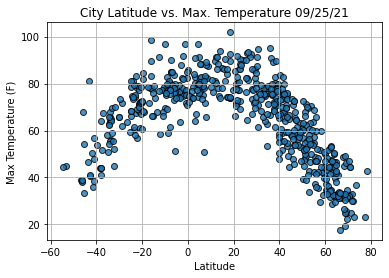

In [22]:
# Import time module
import time

# Build the scatter plot for lat vs max temps
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max. Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

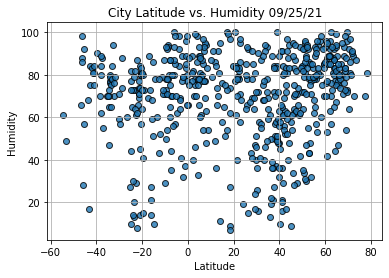

In [24]:
# Build the scatter plot for lat vs max temps
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

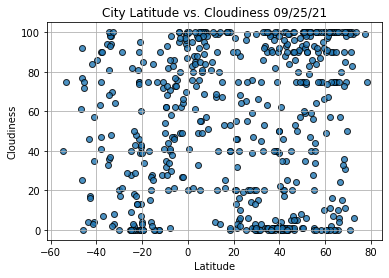

In [26]:
# Build the scatter plot for lat vs max temps
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

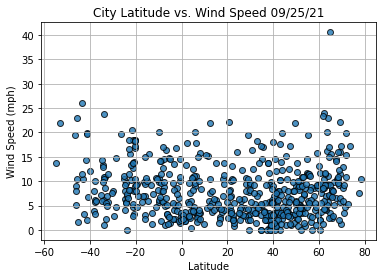

In [28]:
# Build the scatter plot for lat vs max temps
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()